# Data Exploration

In this section, we explore the dataset that we gathered for our analysis, try to visualize the dataset in different ways and provide the insight view of these datasets.

## Discriptive Statistics

In this section, we provide the discriptive statistics for our datasets.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

AAPL = pd.read_csv('AAPL_Cleaned.csv')
MSFT = pd.read_csv('MSFT_Cleaned.csv')
GOOGL = pd.read_csv('GOOGL_Cleaned.csv')
AMZN = pd.read_csv('AMZN_Cleaned.csv')
META = pd.read_csv('META_Cleaned.csv')
TSLA = pd.read_csv('TSLA_Cleaned.csv')

AAPL = AAPL.drop('volume', axis=1)
MSFT = MSFT.drop('volume', axis=1)
GOOGL = GOOGL.drop('volume', axis=1)
AMZN = AMZN.drop('volume', axis=1)
META = META.drop('volume', axis=1)
TSLA = TSLA.drop('volume', axis=1)

In [58]:
#Summary statistics for Data

summary_statistics_AAPL = AAPL.describe()
columns_to_include = [col for col in AAPL.columns if col != 'volume']
summary_statistics_AAPL = AAPL[columns_to_include].describe().drop('count')

summary_statistics_MSFT = MSFT.describe()
columns_to_include = [col for col in MSFT.columns if col != 'volume']
summary_statistics_MSFT = MSFT[columns_to_include].describe().drop('count')

summary_statistics_GOOGL = GOOGL.describe()
columns_to_include = [col for col in GOOGL.columns if col != 'volume']
summary_statistics_GOOGL = GOOGL[columns_to_include].describe().drop('count')

summary_statistics_AMZN = AMZN.describe()
columns_to_include = [col for col in AMZN.columns if col != 'volume']
summary_statistics_AMZN = AMZN[columns_to_include].describe().drop('count')

summary_statistics_META = META.describe()
columns_to_include = [col for col in META.columns if col != 'volume']
summary_statistics_META = META[columns_to_include].describe().drop('count')

summary_statistics_TSLA = TSLA.describe()
columns_to_include = [col for col in TSLA.columns if col != 'volume']
summary_statistics_TSLA = TSLA[columns_to_include].describe().drop('count')


print(summary_statistics_AAPL)
print(summary_statistics_MSFT)
print(summary_statistics_GOOGL)
print(summary_statistics_AMZN)
print(summary_statistics_META)
print(summary_statistics_TSLA)

      Unnamed: 0        open        high        low       close  daily_return
mean   61.000000  182.621618  184.165332  181.28169  182.798740     -0.034470
std    35.651087    7.726758    7.524253    7.81037    7.616109      1.224249
min     0.000000  166.910000  168.960000  165.67000  166.890000     -2.258081
25%    30.500000  176.480000  177.915000  174.96500  176.475000     -0.784270
50%    61.000000  182.130000  183.890000  180.97000  182.410000     -0.214791
75%    91.500000  189.840000  190.785000  188.77500  189.740000      0.651839
max   122.000000  196.235000  198.230000  195.28000  196.450000      5.044233
            open        high         low       close  daily_return
mean  338.371797  341.523667  335.145264  338.381829     -0.084713
std    17.439894   17.460940   17.376831   17.758349      1.421001
min   310.990000  314.299000  309.450000  312.140000     -3.827645
25%   327.380000  330.090000  324.450000  327.615000     -1.063090
50%   333.720000  336.850000  330.390000 

## Visualizations

First, we show the price change directly in a line plot.

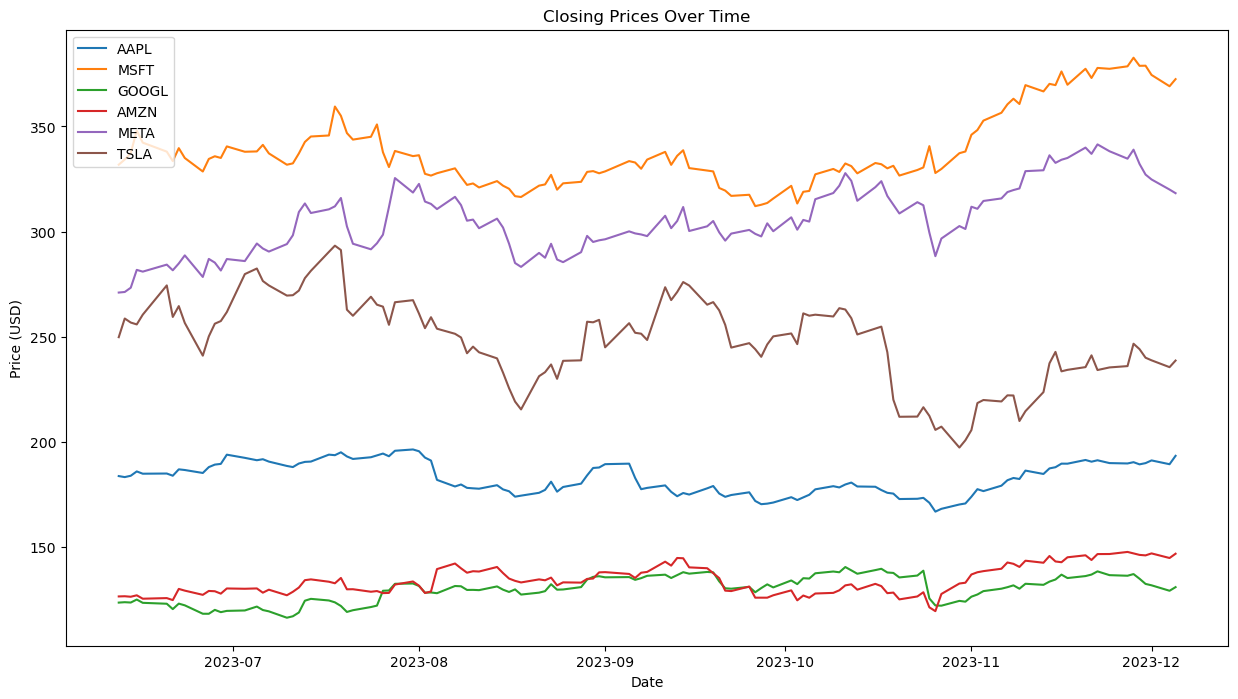

In [59]:
#Line plot for closing price for each company
AAPL['timestamp'] = pd.to_datetime(AAPL['timestamp'])
AAPL.set_index('timestamp', inplace=True)
MSFT['timestamp'] = pd.to_datetime(MSFT['timestamp'])
MSFT.set_index('timestamp', inplace=True)
GOOGL['timestamp'] = pd.to_datetime(GOOGL['timestamp'])
GOOGL.set_index('timestamp', inplace=True)
AMZN['timestamp'] = pd.to_datetime(AMZN['timestamp'])
AMZN.set_index('timestamp', inplace=True)
META['timestamp'] = pd.to_datetime(META['timestamp'])
META.set_index('timestamp', inplace=True)
TSLA['timestamp'] = pd.to_datetime(TSLA['timestamp'])
TSLA.set_index('timestamp', inplace=True)

closing_prices = pd.DataFrame({
    'AAPL': AAPL['close'],
    'MSFT': MSFT['close'],
    'GOOGL': GOOGL['close'],
    'AMZN': AMZN['close'],
    'META': META['close'],
    'TSLA': TSLA['close']
})
plt.figure(figsize=(15, 8))
for ticker in closing_prices.columns:
    plt.plot(closing_prices.index, closing_prices[ticker], label=ticker)

plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

The line plot shows the overall stock price. Each company's stock price trend is distinct. AAPL (Apple) shows a generally upward trend, suggesting a period of growth or positive performance. TSLA (Tesla), on the other hand, exhibits a more volatile trend with significant drops, especially towards the end of the period.

TSLA's stock price shows notable volatility compared to the others, with sharp increases and decreases. This might be indicative of market reactions to news or events specifically related to Tesla.

There seems to be a period where most stocks show a downward trend (particularly noticeable with TSLA, AMZN, and GOOGL), which could point to a market-wide event or sentiment that negatively impacted these stocks.

A noticeable trend across multiple stocks is a general decrease at specific points in time (2023-07 to 2023-08). This could be indicative of market-wide events or sentiments that are negatively impacting the tech sector as a whole.

Then we want to show the distribution for daily return for each company. 

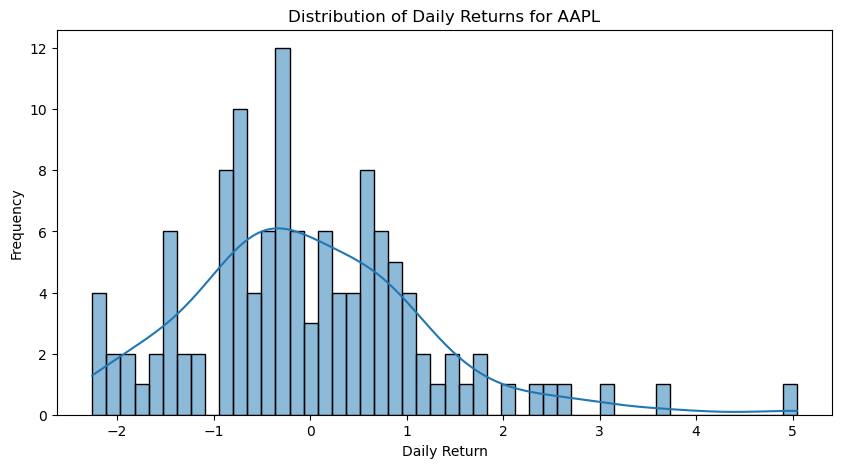

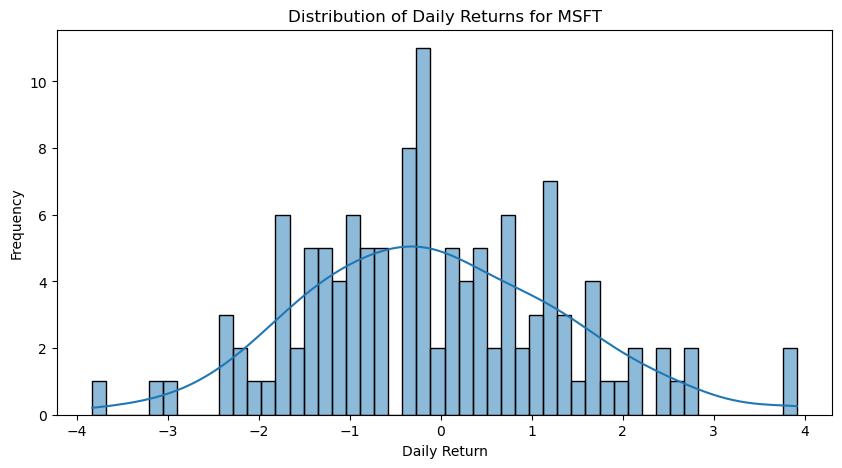

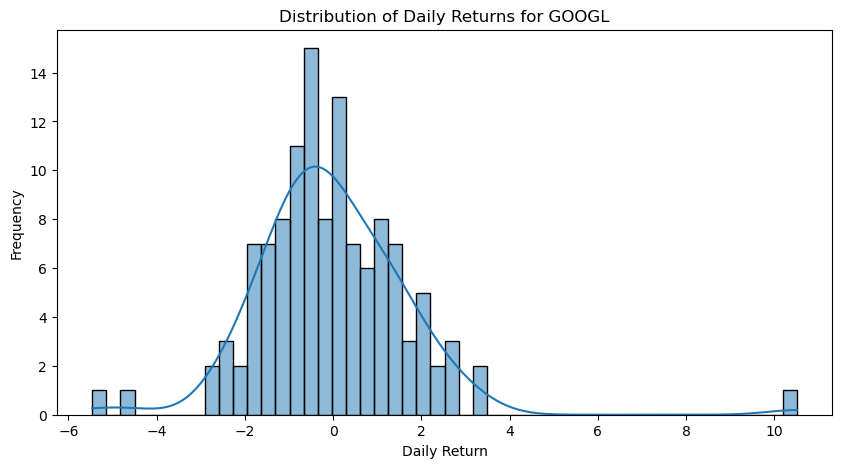

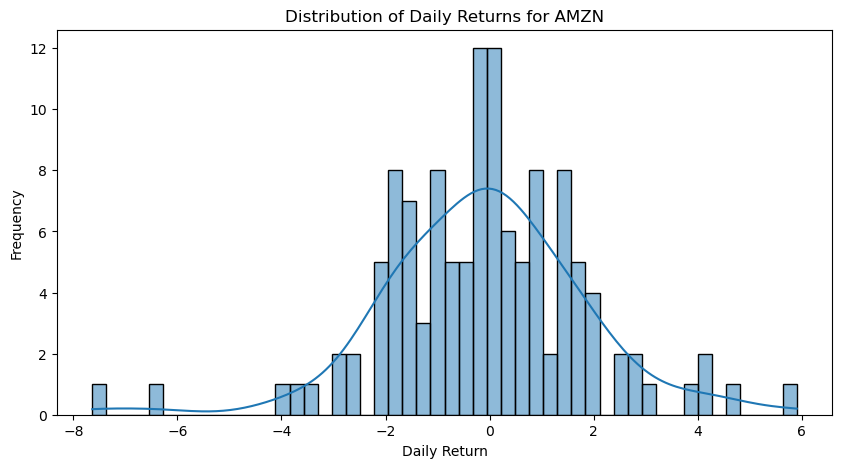

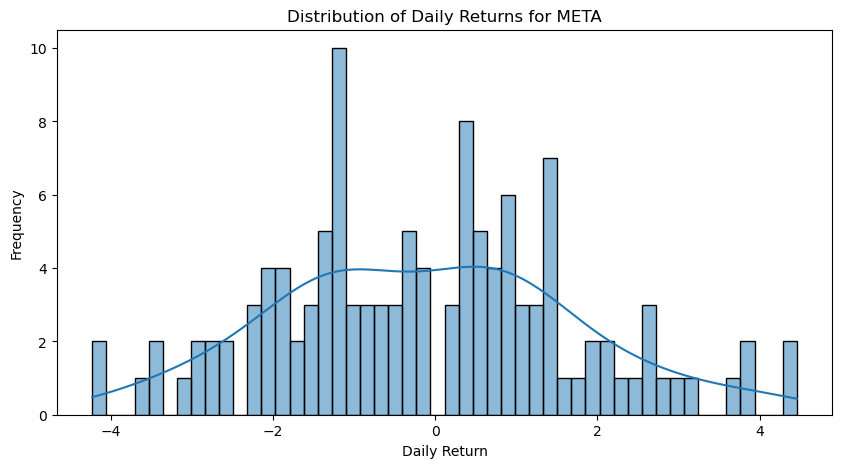

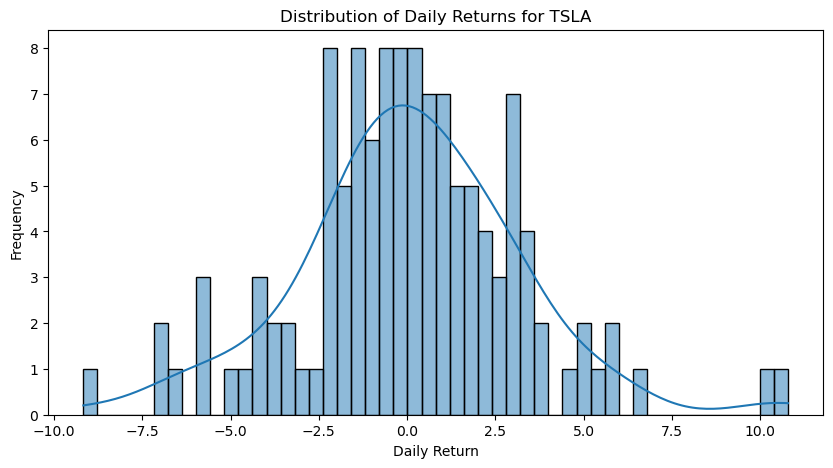

In [54]:
# Distribution for daily return
import seaborn as sns
for column in AAPL.filter(regex='daily_return$').columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(AAPL[column].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of Daily Returns for AAPL')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.show()

for column in MSFT.filter(regex='daily_return$').columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(MSFT[column].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of Daily Returns for MSFT')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.show()

for column in GOOGL.filter(regex='daily_return$').columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(GOOGL[column].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of Daily Returns for GOOGL')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.show()

for column in AMZN.filter(regex='daily_return$').columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(AMZN[column].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of Daily Returns for AMZN')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.show()

for column in META.filter(regex='daily_return$').columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(META[column].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of Daily Returns for META')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.show()

for column in TSLA.filter(regex='daily_return$').columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(TSLA[column].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of Daily Returns for TSLA')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.show()

In all histograms, the distribution of daily returns does not perfectly align with the normal distribution curve, which is common in real-world financial data due to market inefficiencies, company-specific news, and macroeconomic events affecting stock prices. The varying shapes and spreads of these distributions can provide insights into the risk and volatility associated with each company's stock. Investors often analyze these distributions to make decisions about portfolio risk management and investment strategies.

The center of the distribution indicates the major point of daily return, if it is right skewed, then the company has more days with positive daily return, such as Amazon, some are close to 0, means a balance between positive days and negative days. Some distribution have multiple peeks, indicating a high volatility, such as Tesla.

We also create a box plot for daily return. 

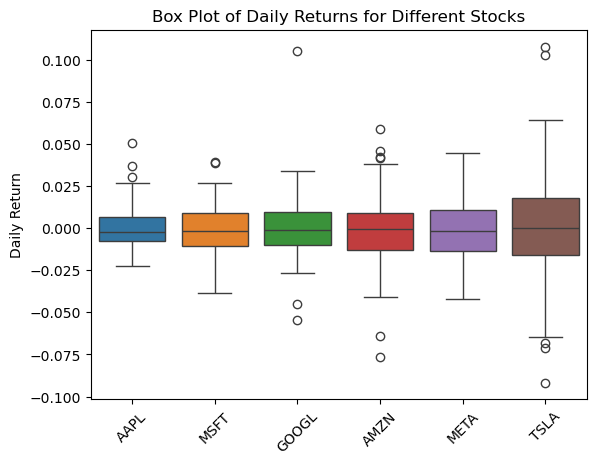

In [60]:
daily_returns = closing_prices.pct_change().dropna()

sns.boxplot(data=daily_returns)

plt.title('Box Plot of Daily Returns for Different Stocks')
plt.ylabel('Daily Return')
plt.xticks(rotation=45)
plt.show()

The medians (central lines within the boxes) are close to zero for most stocks, indicating that the middle value of returns is relatively low or around a neutral change in stock price. The interquartile ranges (IQRs, represented by the length of the boxes) vary, with TSLA (Tesla) showing the widest IQR, suggesting more variability or volatility in daily returns compared to the others.

The circles represent outliers, which are daily returns that lie beyond the expected range. Notably, TSLA has several outliers, which indicates days with exceptional gains or losses compared to typical daily movements.

The box plots for AAPL, MSFT, and GOOGL appear relatively symmetrical around their medians, suggesting an even distribution of daily returns above and below the median. AMZN and META show a slight shift towards the negative end, indicating that daily returns are more frequently on the lower side.

We are trying to figure out if the daily return for different companies have any correlations, so we create a heatmap for each companies.

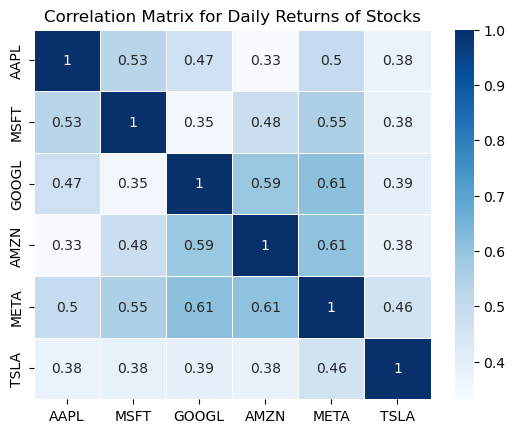

In [61]:
correlation_matrix = daily_returns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=.5)
plt.title('Correlation Matrix for Daily Returns of Stocks')
plt.show()

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1.

In this plot, GOOGL and AMZN show a relatively high positive correlation of 0.59, suggesting that their stock returns tend to move in the same direction. Similarly, GOOGL and META have a correlation of 0.61, AMZN and META also have a correlation of 0.61. 